# 1. Dataset Preparation & Analysis

## 1.2

In [2]:
#1.2 Load dataset
import gzip
import json

dataset_file = "goemotions.json.gz"
dataset = []
#With the unzipped file, we can now load the json file into the dataset list
with gzip.open(dataset_file,'r') as unzipped:
    dataset = json.load(unzipped)

## 1.3

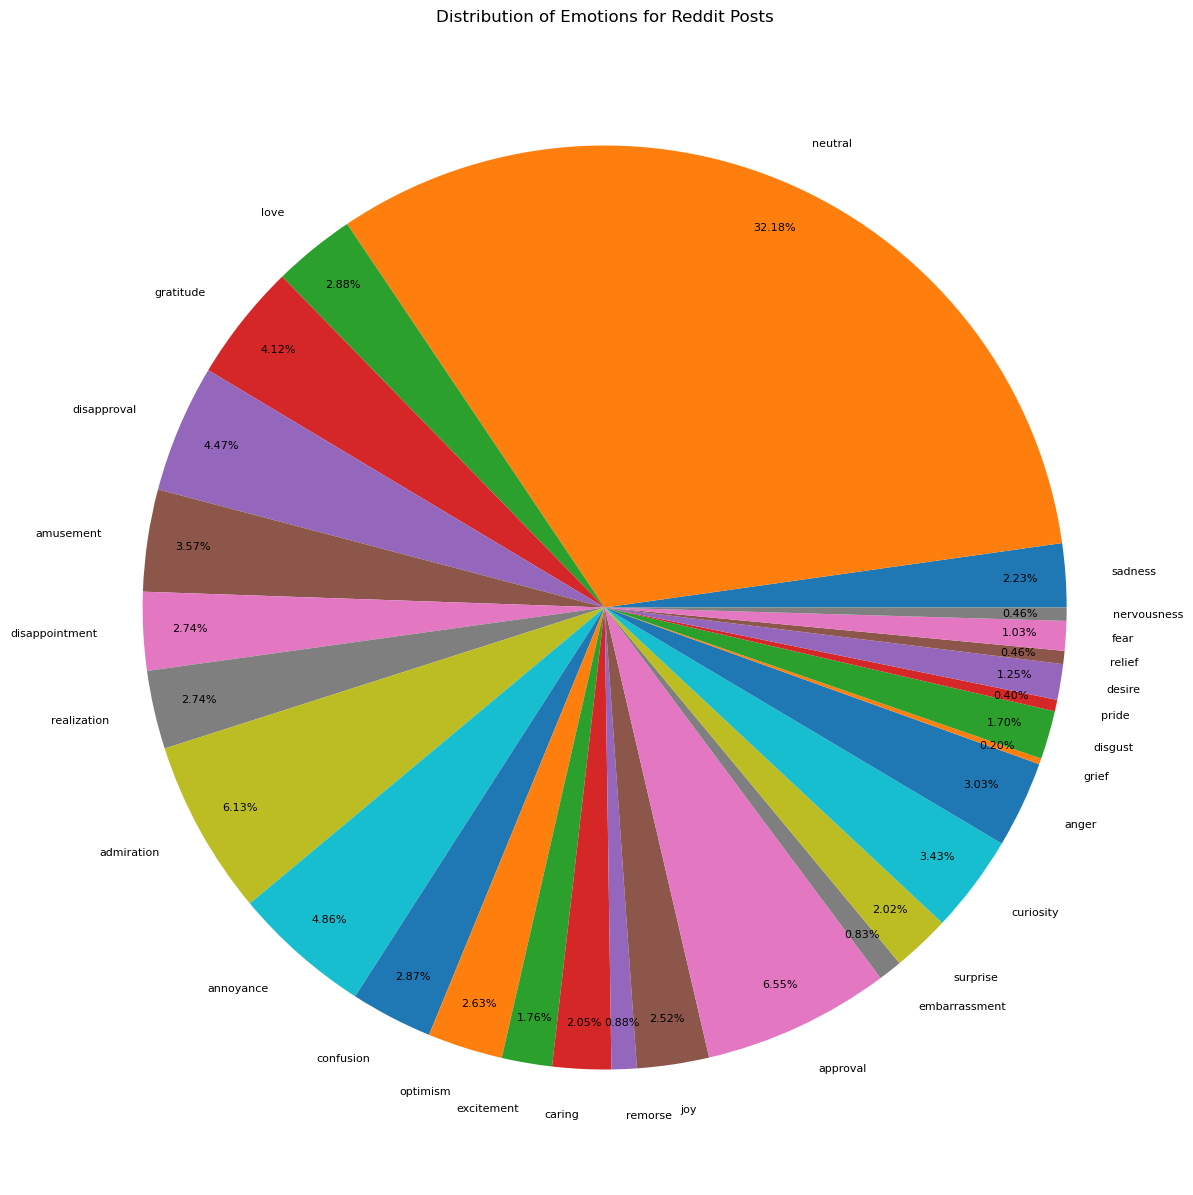

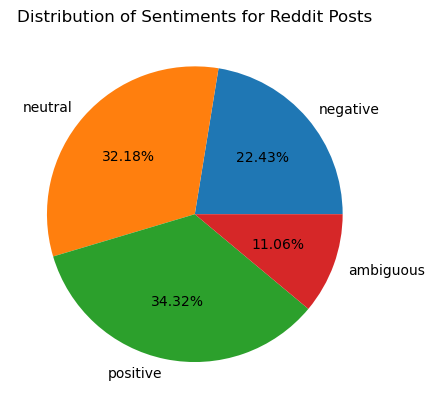

In [3]:
#1.3 Extract the posts and the 2 sets of labels (emotion and sentiment), then plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf
posts = []
emotions = []
sentiments = []
# Setting up lists of posts, emotions and sentiments
for instance in dataset:
    post = instance[0]
    emotion = instance[1]
    sentiment = instance[2]
    
    posts.append(post)
    emotions.append(emotion)
    sentiments.append(sentiment)

#Plot the distribution of the posts in each category and save the graphic (a histogram or pie chart) in pdf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import collections

#Sets up lists of key value pairs for labels and frequency
counter_emotions = collections.Counter(emotions)
counter_sentiments = collections.Counter(sentiments)


#Plot distribution of emotions
plt.figure(figsize=(15,15))
#Autopct is used to display the percentage in the wedges, pctdistance and labeldistance position the labels, textprops is to reduce the fontsize
plt.pie(counter_emotions.values(), labels=counter_emotions.keys(),autopct='%.2f%%', pctdistance=0.9, labeldistance=1.1, textprops={'fontsize': 8}) 
plt.title("Distribution of Emotions for Reddit Posts")
plt.savefig("Emotions_Distribution.pdf")
plt.show()

#Plot distribution of sentiments
plt.pie(counter_sentiments.values(), labels=counter_sentiments.keys(),autopct='%.2f%%')
plt.title("Distribution of Sentiments for Reddit Posts")
plt.savefig("Sentiments_Distribution.pdf")
plt.show()




    

# 2. Words as Features

## 2.1

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

vectorizer = CountVectorizer() # Count vectorizer gives a count for each word

# Extract tokens/words from the reddit posts
X = vectorizer.fit_transform(posts) # Gives a sparse matrix, contains mostly zeroes/empty cells
# Get size of vocabulary
print(f"Size of Vocabulary (# of Tokens): {len(vectorizer.get_feature_names_out())}")

# Encoding the labels as was done in Lab 3. This needs to be done as they are string values and we need numerical values for our models
emotions_encoder = preprocessing.LabelEncoder()
y_emotions = emotions_encoder.fit_transform(emotions)

sentiments_encoder = preprocessing.LabelEncoder()
y_sentiments = sentiments_encoder.fit_transform(sentiments)




Size of Vocabulary (# of Tokens): 30449


## 2.2

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% is training, 20% is test). Doing this for both labels and the main feature set
# Random state is the seed for the random number generator. Makes it so we can reproduce the same sets each time
X_train, X_test, y_emotions_train, y_emotions_test, y_sentiments_train, y_sentiments_test = train_test_split(X, y_emotions, y_sentiments, test_size=0.2, random_state=2212)


## 2.3

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

# 2.3.1 Base-NMB
classifier = MultinomialNB()
# 2.3.2 Base-DT
dtc = tree.DecisionTreeClassifier()
# 2.3.3 Base-MLP
nn = neural network.MLPClassifier()
# 2.3.4 Top-MNB

# 2.3.5 Top-DT

# 2.3.6 Top-MLP
